In [8]:
## Trying to run kmeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
fetal = pd.read_csv("fetal_health.csv")
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
# Going to scale these, why? Not sure, think so all have equal influence
scaler = StandardScaler()
scaled_coefs = scaler.fit_transform(fetal)

In [23]:
#here we'll use the elbow method to determine how many cluster we should have
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter": 300,
    "random_state":42,
}
sse = []
for k in range(1,30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_coefs)
    sse.append(kmeans.inertia_)

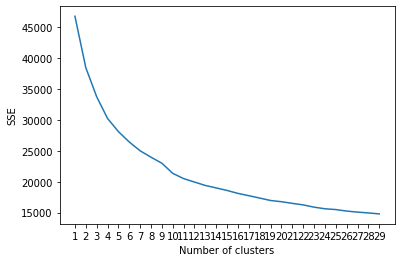

In [24]:
plt.plot(range(1,30),sse)
plt.xticks(range(1,30))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()
# 10 appears to be the sort of elbow here

In [25]:
kmeans = KMeans(n_clusters=10,init='k-means++', max_iter=300, n_init = 10, random_state=42)


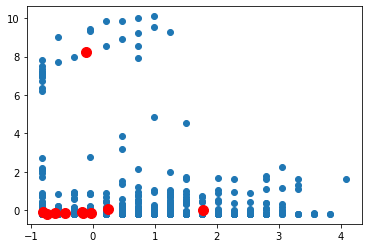

In [27]:
pred_y = kmeans.fit_predict(scaled_coefs)

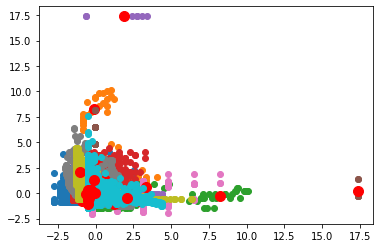

In [28]:
for i in range(0,10):
    plt.scatter(scaled_coefs[:,i],scaled_coefs[:,i+1])
    plt.scatter(kmeans.cluster_centers_[:,i],kmeans.cluster_centers_[:,i+1],s=100,c='red')